In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-purchases/Ecommerce Purchases


In [2]:
df=pd.read_csv('/kaggle/input/ecommerce-purchases/Ecommerce Purchases')
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


# 1. **Display Top 10 Rows of The Dataset**

In [3]:
df.head(10)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82
5,"7502 Powell Mission Apt. 768\nTravisland, VA 3...",21 XT,PM,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_5...,Silva-Anderson,30246185196287,07/25,7169,Discover,ynguyen@gmail.com,Fish farm manager,55.96.152.147,ru,25.15
6,"93971 Conway Causeway\nAndersonburgh, AZ 75107",96 Xt,AM,Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...,Gibson and Sons,6011398782655569,07/24,714,VISA 16 digit,olivia04@yahoo.com,Dancer,127.252.144.18,de,88.56
7,"260 Rachel Plains Suite 366\nCastroberg, WV 24...",96 pG,PM,Mozilla/5.0 (X11; Linux i686) AppleWebKit/5350...,Marshall-Collins,561252141909,06/25,256,VISA 13 digit,phillip48@parks.info,Event organiser,224.247.97.150,pt,44.25
8,"2129 Dylan Burg\nNew Michelle, ME 28650",45 JN,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Galloway and Sons,180041795790001,04/24,899,JCB 16 digit,kdavis@rasmussen.com,Financial manager,146.234.201.229,ru,59.54
9,"3795 Dawson Extensions\nLake Tinafort, ID 88739",15 Ug,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,"Rivera, Buchanan and Ramirez",4396283918371,01/17,931,American Express,qcoleman@hunt-huerta.com,Forensic scientist,236.198.199.8,zh,95.63


# 2. **Check Last 10 Rows of The Dataset**

In [4]:
df.tail(10)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
9990,"75731 Molly Springs\nWest Danielle, VT 96934-5102",93 ty,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4;...,"Pace, Vazquez and Richards",869968197049750,04/24,877,JCB 15 digit,andersonmichael@sherman.biz,Early years teacher,54.170.3.185,ru,18.35
9991,"PSC 8165, Box 8498\nAPO AP 60327-0346",50 dA,AM,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Snyder Inc,4221582137197481,02/24,969,Voyager,kking@wise-liu.com,IT sales professional,254.25.31.156,el,25.93
9992,"885 Allen Mountains Apt. 230\nWallhaven, LA 16995",40 vH,PM,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_6_5) A...,Wells Ltd,4664825258997302,10/20,431,Discover,bberry@wright.net,Set designer,174.173.51.32,de,67.96
9993,"7555 Larson Locks Suite 229\nEllisburgh, MA 34...",72 jg,PM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_8...,Colon and Sons,30025560104631,10/25,629,Maestro,chelseawilliams@lopez.biz,"Designer, exhibition/display",177.46.82.128,el,65.61
9994,"6276 Rojas Hollow\nLake Louis, WY 56410-7837",93 Ex,PM,Opera/9.68.(X11; Linux x86_64; sl-SI) Presto/2...,Ritter-Smith,3112186784121077,01/25,1823,Maestro,iroberts@gmail.com,"Education officer, museum",242.44.112.18,zh,31.85
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84
9999,"40674 Barrett Stravenue\nGrimesville, WI 79682",64 Hr,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,Greene Inc,4139972901927273,02/19,302,JCB 15 digit,rachelford@vaughn.com,"Embryologist, clinical",176.119.198.199,el,67.59


# 3. **Check Datatype of Each Column**

In [5]:
df.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

# 4. **Check null values in the dataset** 

In [6]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

# 5. **How many rows and columns are there in our Dataset?**

In [7]:
df.shape

(10000, 14)

In [8]:
len(df.columns) #Number of Columns

14

In [9]:
len(df) #Number of Rows

10000

# 6. **Highest and Lowest Purchase Prices.**

In [10]:
df['Purchase Price'].max() #Highest Purchase Price

99.99

In [11]:
df['Purchase Price'].min() #Lowest Purchase Price

0.0

# 7. **Average Purchase Price**

In [12]:
df['Purchase Price'].mean() #Average Purchase Price

50.347302

# 8. **How many people have French 'fr' as their Language?**

In [13]:
len(df[df['Language']=='fr'])

1097

# 9. **Job Title Contains Engineer**

In [14]:
len(df[df['Job'].str.contains('engineer', case=False)])

984

# 10. **Find The Email of the person with the following IP Address: 132.207.160.22**

In [15]:
df[df['IP Address']=='132.207.160.22']['Email']

2    amymiller@morales-harrison.com
Name: Email, dtype: object

# 11. **How many People have Mastercard as their Credit Card Provider and made a purchase above 50?**

In [16]:
len(df.loc[(df['CC Provider']=='Mastercard') & (df['Purchase Price']>50)])

405

# 12. **Find the email of the person with the following Credit Card Number: 4664825258997302**

In [17]:
df[df['Credit Card']==4664825258997302]['Email']

9992    bberry@wright.net
Name: Email, dtype: object

# 13. **How many people purchase during the AM and how many people purchase during PM?**

In [18]:
len(df[df['AM or PM']=='AM']) # Number of People Purchase during the AM

4932

In [19]:
len(df[df['AM or PM']=='PM']) # Number of People Purchase during the PM

5068

In [20]:
df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

# 14. **How many people have a credit card that expires in 2020?**

In [21]:
df['CC Exp Date'].str.contains("20$", regex=True).sum()

988

# 15. **What are the top 5 most popular email providers (e.g. gmail.com, yahoo.com, etc...)**

In [22]:
def fun():
    m={}
    for email in df['Email']:
        if email.split('@')[1] not in m:
            m[email.split('@')[1]]=0
        m[email.split('@')[1]]+=1
    return m
f=pd.Series(fun())
f.sort_values(ascending=False,inplace=True)
f.head()

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
dtype: int64

In [23]:
df['Email'].apply(lambda x:x.split('@')[1]).value_counts().head()
# Another Method or One Liner

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

# **Data Visualization**

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

new_df=f.head()
x=list(new_df.index)
y=list(new_df.values)

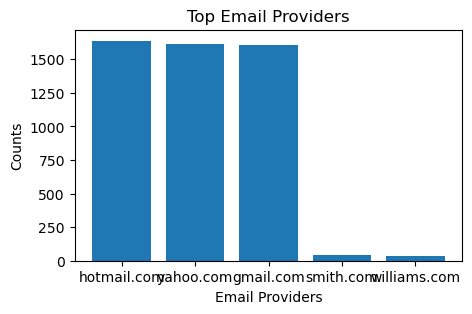

In [25]:
# plt.xlabel('x label')
# plt.ylabel('y label')
# plt.title('z label')
fig,ax=plt.subplots(figsize=(5,3)) # Create a figure containing a single axes.
ax.set_xlabel('Email Providers') #x Axis Label
ax.set_ylabel('Counts') #y Axis Label
ax.set_title('Top Email Providers') # Title
# ax.plot(x,y,color="red") # For Line
# ax.scatter(x,y,marker='D') # For Markers
ax.bar(x,y) # For Bar Graph
# plt.figure('R')
# ax.grid(True)
plt.show()